## importing libraries

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## data gathering

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
titanic = pd.read_csv("titanic.csv")

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
flights = sns.load_dataset('flights')

In [8]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [9]:
iris = pd.read_csv("Iris.csv")

In [10]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## bivariate and multivariate analysis 

### scatterplot (numerical - numerical)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

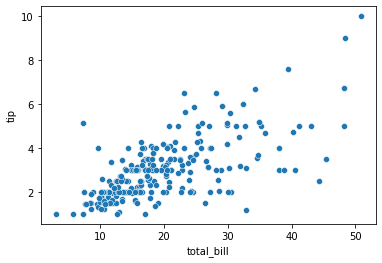

In [11]:
# bivariate analysis
sns.scatterplot(tips['total_bill'],tips['tip'])

In [ ]:
# we can see linear relationship between 2 columns
# as the total_bill is increasing, tip is also increasing

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

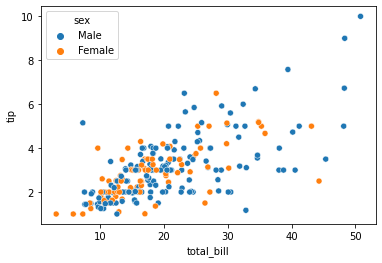

In [12]:
# multivariate analysis
sns.scatterplot(tips['total_bill'],tips['tip'],hue=tips['sex'])

In [ ]:
# high total_bill and tip has mostly been paid by male

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

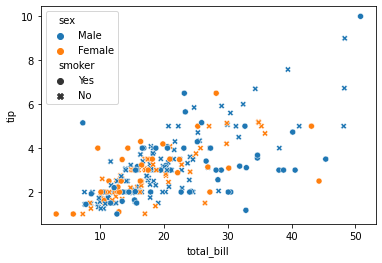

In [13]:
# multivariate analysis
sns.scatterplot(tips['total_bill'],tips['tip'],hue=tips['sex'],style=tips['smoker'])

### barplot (numerical - categorical)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

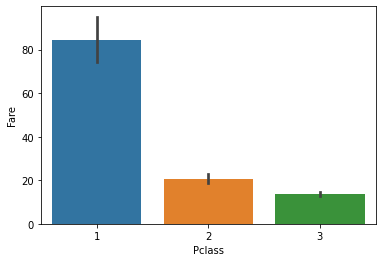

In [14]:
# bivariate analysis
sns.barplot(titanic['Pclass'],titanic['Fare'])

In [ ]:
# for Pclass1, the fare was very high and also the number of people travelling were also high
# no much difference between fare and people travelling in Pclass2 Pclass3

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

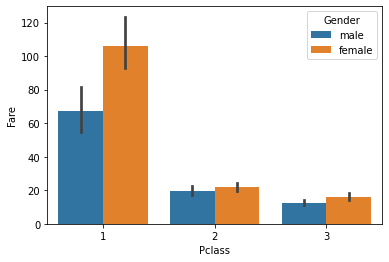

In [15]:
# multivariate analysis
sns.barplot(titanic['Pclass'],titanic['Fare'],hue=titanic['Gender'])

In [ ]:
# female fare is greater as compared to male

### boxplot (numerical - categorical)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

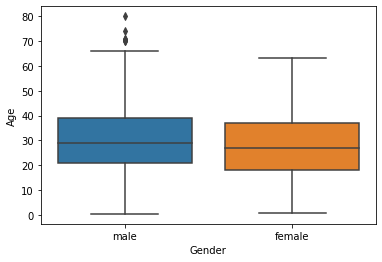

In [16]:
# bivariate analysis
sns.boxplot(titanic['Gender'],titanic['Age'])

In [ ]:
# outliers are present in male and no outliers in female

### distplot (numerical - categorical)

<AxesSubplot:xlabel='Age', ylabel='Density'>

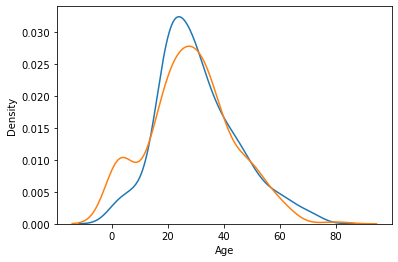

In [18]:
# bivariate analysis
sns.distplot(titanic[titanic['Survived']==0]['Age'],hist=False) #not survived blue
sns.distplot(titanic[titanic['Survived']==1]['Age'],hist=False) #survived orange

In [ ]:
# probability of surviving at younger age is higher
# probability of not surviving is higher in the range of age between 15 to 30 and 60 to 80

### heatmap (categorical - categorical)

In [19]:
# checking as per Pclass
pd.crosstab(titanic['Pclass'],titanic['Survived']) #or we can use groupby

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,370,121


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

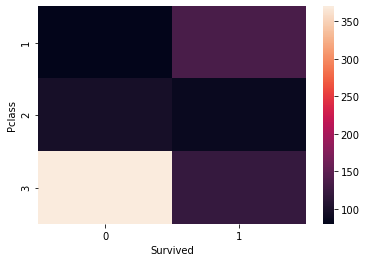

In [20]:
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']))

In [21]:
(titanic.groupby('Pclass').mean()['Survived']*100)

Pclass
1    62.962963
2    47.282609
3    24.643585
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass'>

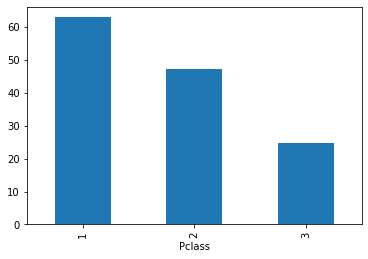

In [22]:
(titanic.groupby('Pclass').mean()['Survived']*100).plot(kind='bar')

In [ ]:
# 62% of the people from Pclass 1 were survived

In [23]:
# checking as per Gender
pd.crosstab(titanic['Gender'],titanic['Survived'])

Survived,0,1
Gender,,
female,81,233
male,466,111


<AxesSubplot:xlabel='Survived', ylabel='Gender'>

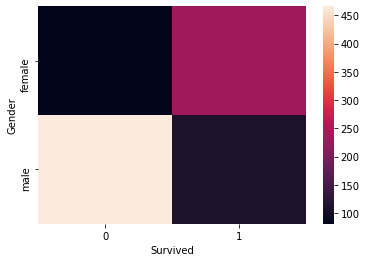

In [24]:
sns.heatmap(pd.crosstab(titanic['Gender'],titanic['Survived']))

In [25]:
(titanic.groupby('Gender').mean()['Survived']*100)

Gender
female    74.203822
male      19.237435
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Gender'>

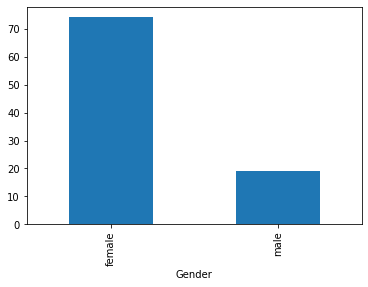

In [26]:
(titanic.groupby('Gender').mean()['Survived']*100).plot(kind='bar')

In [ ]:
# 74% female were survived

In [27]:
# checking as per Embarked
pd.crosstab(titanic['Embarked'],titanic['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,46,31
S,426,218


In [28]:
(titanic.groupby('Embarked').mean()['Survived']*100)

Embarked
C    55.357143
Q    40.259740
S    33.850932
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Embarked'>

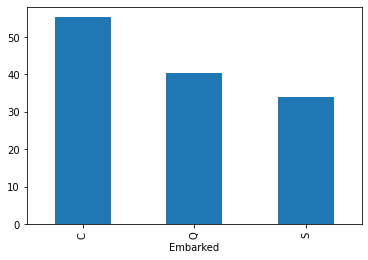

In [29]:
(titanic.groupby('Embarked').mean()['Survived']*100).plot(kind='bar')

In [ ]:
# 55% people embarked from C were survived

In [30]:
# multivariate analysis
(titanic.groupby(['Embarked','Gender']).mean()['Survived']*100)

Embarked  Gender
C         female    87.671233
          male      30.526316
Q         female    75.000000
          male       9.756098
S         female    68.965517
          male      17.687075
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Embarked,Gender'>

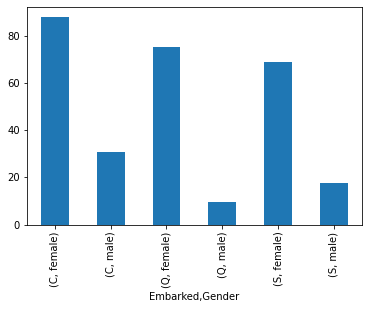

In [31]:
(titanic.groupby(['Embarked','Gender']).mean()['Survived']*100).plot(kind='bar')

### pairplot

In [32]:
iris.drop('Id',axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


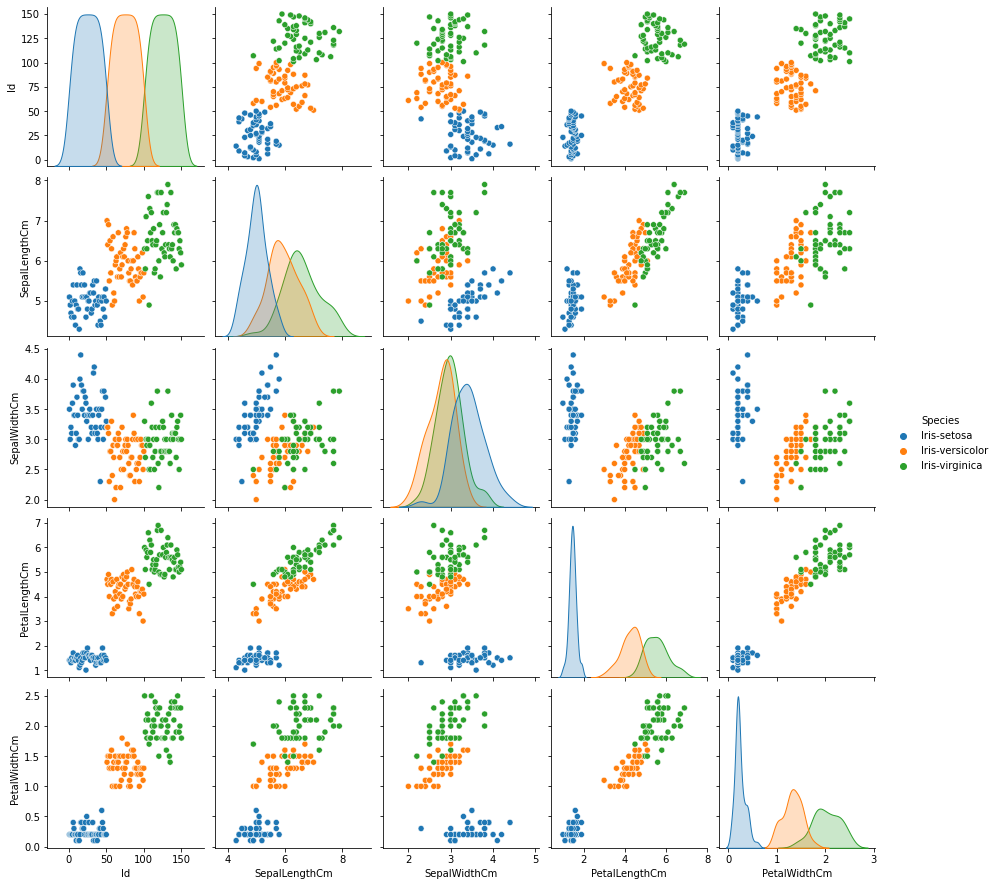

In [33]:
sns.pairplot(iris,hue='Species')

### lineplot (numerical - numerical)

In [ ]:
# used when we have time / date / month / year on x-axis

In [34]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [35]:
new = flights.groupby('year').sum().reset_index()
new

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


<AxesSubplot:xlabel='year', ylabel='passengers'>

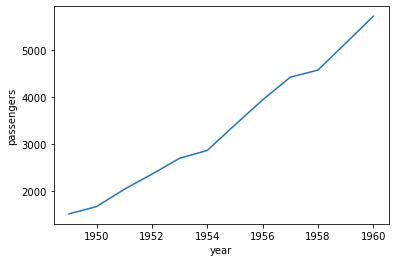

In [36]:
sns.lineplot(new['year'],new['passengers'])

In [37]:
flights.pivot_table(values='passengers',index='month',columns='year').head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


<AxesSubplot:xlabel='year', ylabel='month'>

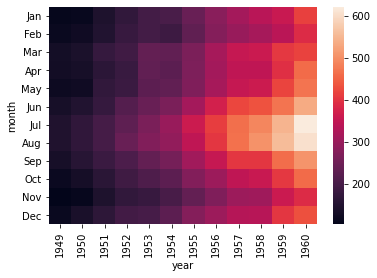

In [38]:
sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'))